In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D


In [2]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [3]:
import matplotlib.pyplot as plt

# Task1

## Ex. 1. Use the head and describe function to examine the data and display few columns.

In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Ex. 2. Plot and analyze the data, where: x - population, y - profit.

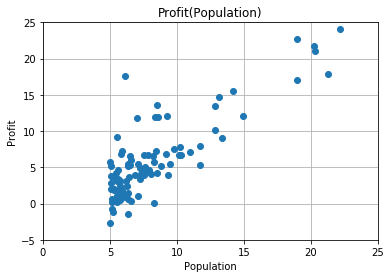

In [6]:
figure1 = plt.Figure()
plt.plot(data['Population'],data['Profit'],'o')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Profit(Population)')
plt.xlim(0,25)
plt.ylim(-5,25)
plt.grid()

### Comment: shape of linear regression is rather easy to predict. 

## Ex. 3 In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.

In [7]:
data.insert(0, "1s", 1) #To insert a column (where to insert, name, values)
#del data["1s"]          #To delete the column(name)

In [8]:
data.head(10)

,1s,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233
5,1,8.3829,11.8860
6,1,7.4764,4.3483
7,1,8.5781,12.0000
8,1,6.4862,6.5987
9,1,5.0546,3.8166


## Ex. 4. We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 2). Check with the head function if your implementation is correct:

In [9]:
X_1 = pd.DataFrame(data = np.c_[data["1s"], data["Population"]], columns = ["1s","Population"])

In [10]:
X_1.head(5)

,1s,Population
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598


In [11]:
Y_1 = pd.DataFrame(data = data["Profit"])
Y_1.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


### Finally, we’re going to convert our data frames to numpy matrices and instantiate a parameter matirx. We also need to initialise parameter θ.

In [12]:
x = np.matrix(X_1.values)
y = np.matrix(Y_1.values)
theta = np.matrix(np.array([0,0]))

## Ex. 6 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X, y and parameter θ.

In [13]:
mult = np.multiply #aliasing
power = np.power   #aliasing
summarize = np.sum #aliasing

def computeCost(X, y, theta):
    
    m = len(y)
    h = mult(theta,X)
    f = h.sum(axis = 1)
    J = (1/(2*m))*summarize(power((f - y),2))

    return J
        
    

## Ex. 7 Test the cost function with (θ=0).Output: 32.07 (may differ…)

In [14]:
print(computeCost(x,y,theta))

32.072733877455676


## Ex. 8. Please implement the gradient descent algorithm:
### -the function returns optimized values θ and a vector of the cost function value for each iteration

In [15]:
mult = np.multiply #aliasing
power = np.power   #aliasing
summarize = np.sum #aliasing

def gradient_prosty(X, y, theta, alpha, it):
    # it - iteration nb.
    m = len(X)
    cost = np.zeros(it)
    
    for i in range(it):
        h = mult(theta,X)
        f = h.sum(axis = 1)
        cost[i] = computeCost(X, y, theta)
        theta = np.matrix(np.array(theta[0] - (alpha/m)*np.sum((mult((f - y),X) ), axis = 0)))
        
    return theta, cost

## Ex. 9 Please calculate the optimal parameters for the dataset.

In [16]:
alpha = 0.01
it = 1000
theta_res, cost = gradient_prosty(x, y, theta, alpha, it)
print(theta_res)

[[-3.24140214  1.1272942 ]]


In [17]:
arg = np.linspace(0, 25, 2)
linReg1 = theta_res[0,1] * arg + theta_res[0,0]

## Ex. 10 Please calculate the cost function for the given (zad.8) θ.

In [18]:
print(computeCost(x, y, theta_res))

4.515955503078912


## Ex. 11 Plot the regression function and our dataset.

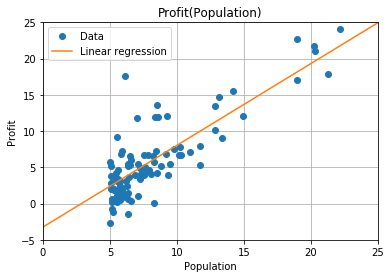

In [19]:
figure1 = plt.Figure()
plt.plot(data['Population'],data['Profit'],'o')
plt.plot(arg,linReg1)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Profit(Population)')
plt.xlim(0,25)
plt.ylim(-5,25)
plt.legend(['Data','Linear regression'])
plt.grid()

## Ex. 12 Plot the relationship between the cost function and number of iterations.

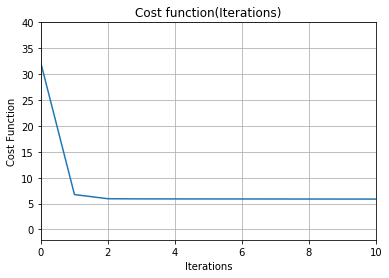

In [20]:
arg2 = np.linspace(0, 1000,1000)
figure1 = plt.Figure()
plt.plot(arg2,cost)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost function(Iterations)')
plt.xlim(0,10)
plt.ylim(-2,40)
plt.grid()


# Task2

In [21]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Ex. 1

In [23]:
data2 = (data2 - data2.mean())/data2.std()

## Ex. 2

### step3

In [24]:
data2.insert(0, "1s", 1)
data2.head(3)

,1s,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626


### step4

In [25]:
X_2 = pd.DataFrame(data = np.c_[data2["1s"], data2["Size"], data2["Bedrooms"]], columns = ["1s","Size","Bedrooms"])
X_2.head(2)

,1s,Size,Bedrooms
0,1.0,0.13001,-0.223675
1,1.0,-0.50419,-0.223675


In [26]:
Y_2 = pd.DataFrame(data = data2["Price"])
Y_2.head(3)

,Price
0,0.475747
1,-0.084074
2,0.228626


### step5

In [27]:
x2 = np.matrix(X_2.values)
y2 = np.matrix(Y_2.values)
theta2 = np.matrix(np.array([0,0,0]))

### step7

In [28]:
print(computeCost(x2, y2, theta2))

0.4893617021276596


### step8

In [29]:
alpha2 = 0.01
it2 = 1000

### step9

In [30]:
theta2_res, cost2 = gradient_prosty(x2, y2, theta2, alpha2, it2)
print(theta2_res)

[[-1.10868761e-16  8.78503652e-01 -4.69166570e-02]]


### step10

In [31]:
print("Cost function for optimized theta: ",computeCost(x2,y2,theta2_res))

Cost function for optimized theta:  0.13070336960771892


### step11

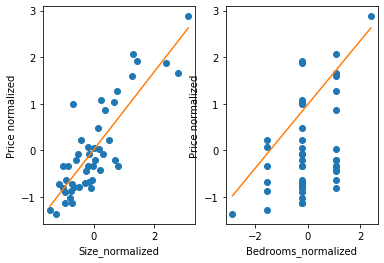

In [33]:
fig, axs = plt.subplots(1,2)

arg_max = x2[:,1].argmax()
fmax = np.dot(theta2_res, x2[arg_max].transpose())
arg_min = x2[:,1].argmin()
fmin = np.dot(theta2_res, x2[arg_min].transpose())

axs[0].plot(data2['Size'],data2['Price'],'o')
axs[0].set(xlabel = 'Size_normalized', ylabel = 'Price normalized')
axs[0].plot([x2[arg_min,1], x2[arg_max,1]],[fmin[0,0],fmax[0,0]])

arg_max = x2[:,2].argmax()
fmax = np.dot(theta2_res, x2[arg_max].transpose())
arg_min = x2[:,2].argmin()
fmin = np.dot(theta2_res, x2[arg_min].transpose())

axs[1].plot(data2['Bedrooms'],data2['Price'],'o')
axs[1].set(xlabel = 'Bedrooms_normalized', ylabel = 'Price normalized')
axs[1].plot([x2[arg_min,2], x2[arg_max,2]],[fmin[0,0],fmax[0,0]])


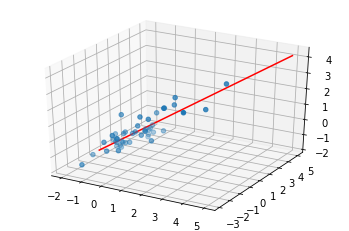

In [34]:
ax = plt.axes(projection='3d')
ax.scatter3D(data2['Size'], data2['Bedrooms'], data2['Price'], cmap='Greens');

xline = np.linspace(-2,5,1000)
yline = np.linspace(0,5,1000)
zline = theta2_res[0,2]*yline+theta2_res[0,1]*xline+theta2_res[0,0]

ax.plot3D(xline, yline, zline, 'red')

### step12

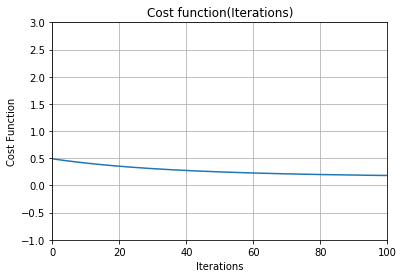

In [35]:
arg3 = np.linspace(0, 1000,1000)
figure1 = plt.Figure()
plt.plot(arg2,cost2)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost function(Iterations)')
plt.xlim(0,100)
plt.ylim(-1,3)
plt.grid()

## Exercise - Boston database

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
regr = linm.LinearRegression()
regr.fit(boston_X, boston_Y)
Y_predicted = regr.predict(boston_X)

In [38]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [39]:
error = np.mean((regr.predict(boston_X) - boston_Y) ** 2)
print("Residual sum of squares: {}".format(error))

Residual sum of squares: 21.894831181729202


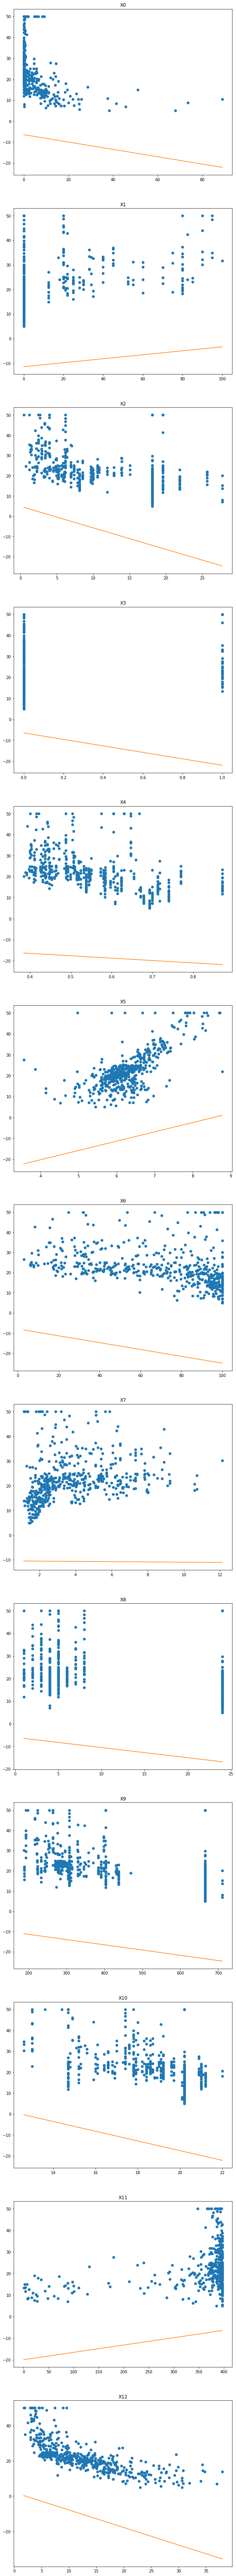

In [42]:
fig, axes = plt.subplots(13, 1, figsize=(10, 120))
for i in range(13):
    axes[i].plot(boston_X[:,i],boston_Y,'o')
    arg_max = boston_X[:,i].argmax()
    arg_min = boston_X[:,i].argmin()
    
    fmax = np.dot(boston_X[arg_max],regr.coef_) 
    fmin = np.dot(boston_X[arg_min],regr.coef_) 
    axes[i].plot([boston_X[arg_min,i], boston_X[arg_max,i]],[fmin, fmax])
    axes[i].set_title("X"+str(i))